# Data Visualization

## 1. Import libraries  and graphs configuration

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import re

import seaborn as sns
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

import requests

In [2]:
# Configuration to set and default all Seaborn figures to a specific size.
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
# We import our first DataFrame: df_population
df_population = pd.read_csv('../Data/clean_WorldPopulation.csv')

In [4]:
display(df_population)

,Year,Population
0,2020,7794798739
1,2019,7713468100
2,2018,7631091040
3,2017,7547858925
4,2016,7464022049
...,...,...
65,1955,2773019936
66,1954,2724846741
67,1953,2677608960
68,1952,2630861562


<AxesSubplot:xlabel='Year', ylabel='Population'>

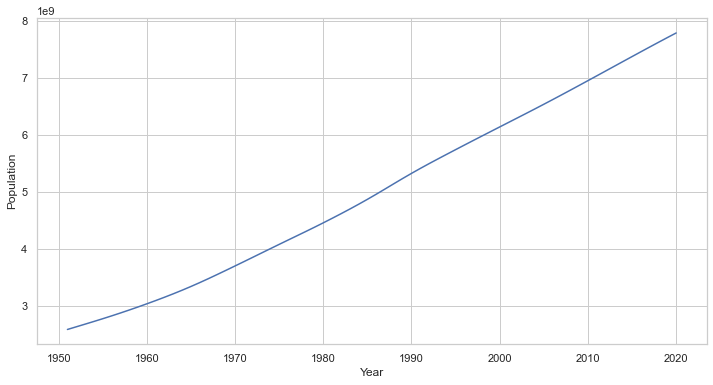

In [5]:
sns.lineplot(data=df_population, x='Year', y='Population')

This graph shows how the population in the world has grown significantly since the 1950s to year 2020. 

In [6]:
# We import a df about population growth, that also includes data regarding ocean temperatura in the last decades. 
final_df = pd.read_csv('../Data/final_df.csv')

In [7]:
display(final_df)

,Unnamed: 0,Decade,Temperature,Population
0,0,1950,13.98,2445756393
1,1,1960,13.99,2954006871
2,2,1970,14.00,3602760834
3,3,1980,14.18,4312540555
4,4,1990,14.31,5094413294
5,5,2000,14.51,5817069827


In [8]:
#sns.countplot(x = df_population.Year)

<AxesSubplot:xlabel='Decade', ylabel='Temperature'>

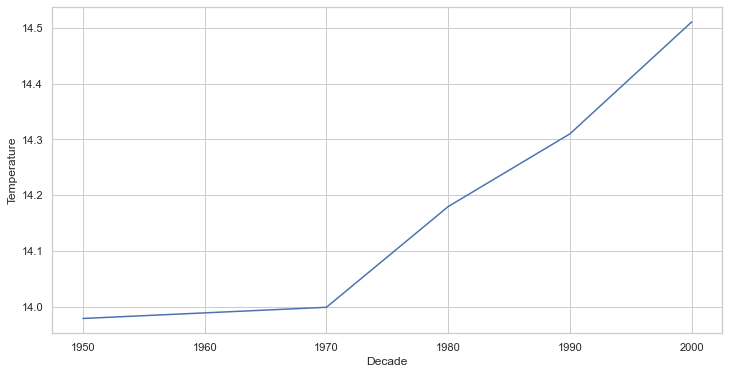

In [9]:
sns.lineplot(data=final_df, x="Decade", y="Temperature")

This graph shows how the temperature of the oceans has increased significantly since de 70s. 

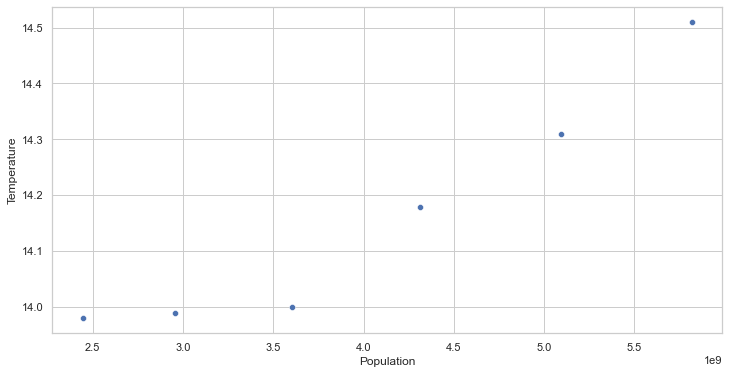

In [10]:
sns.scatterplot(x="Population", y="Temperature", data=final_df);

<AxesSubplot:xlabel='Population', ylabel='Temperature'>

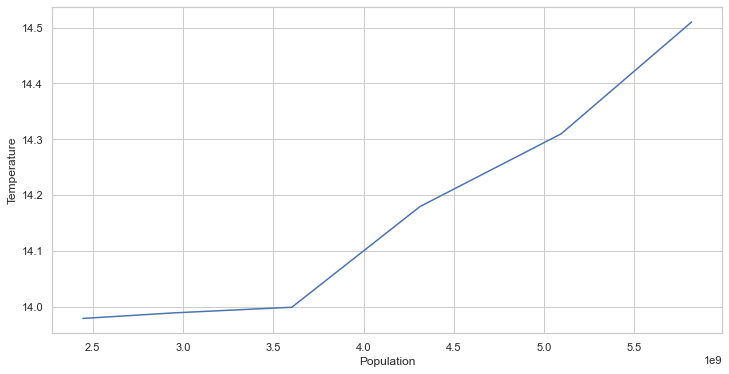

In [11]:
sns.lineplot(data=final_df, x="Population", y="Temperature")

In both graphs we can see how the values of temperature of the oceans rises along with the population growth. 

In [12]:
pwd

'/Users/awalsh/IRONHACK/PROYECTOS/W3-pipelines-project/Notebooks'

We import another df that includes information about the concentration of CO2 over the years. 

In [13]:
df_co2 = pd.read_csv('../Data/df_co2.csv')

In [14]:
df_co2["Day"] = pd.to_datetime(df_co2['Day'], format='%Y-%m-%d')
# %Y-%m-%d


In [15]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Entity                      499 non-null    object        
 1   Day                         499 non-null    datetime64[ns]
 2   average_co2_concentrations  499 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.8+ KB


In [16]:
df_co2['year'] = pd.DatetimeIndex(df_co2['Day']).year
df_co2['month'] = pd.DatetimeIndex(df_co2['Day']).month

In [17]:
df_co2.head(30)

,Entity,Day,average_co2_concentrations,year,month
0,World,1980-01-15,338.55,1980,1
1,World,1980-02-15,339.27,1980,2
2,World,1980-03-15,339.60,1980,3
3,World,1980-04-15,340.00,1980,4
4,World,1980-05-15,340.43,1980,5
5,World,1980-06-15,339.99,1980,6
6,World,1980-07-15,338.44,1980,7
7,World,1980-08-15,337.21,1980,8
8,World,1980-09-15,337.05,1980,9
9,World,1980-10-15,337.83,1980,10


In [18]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Entity                      499 non-null    object        
 1   Day                         499 non-null    datetime64[ns]
 2   average_co2_concentrations  499 non-null    float64       
 3   year                        499 non-null    int64         
 4   month                       499 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 19.6+ KB


In [19]:
df_co2.astype({'year':int})

,Entity,Day,average_co2_concentrations,year,month
0,World,1980-01-15,338.55,1980,1
1,World,1980-02-15,339.27,1980,2
2,World,1980-03-15,339.60,1980,3
3,World,1980-04-15,340.00,1980,4
4,World,1980-05-15,340.43,1980,5
...,...,...,...,...,...
494,World,2021-03-15,415.61,2021,3
495,World,2021-04-15,415.93,2021,4
496,World,2021-05-15,416.12,2021,5
497,World,2021-06-15,415.34,2021,6


In [20]:

df_grouped = pd.DataFrame(df_co2.groupby("year")["average_co2_concentrations"].mean()).reset_index()
df_grouped.head()

,year,average_co2_concentrations
0,1980,338.911667
1,1981,340.105000
2,1982,340.856667
3,1983,342.530833
4,1984,344.074167


In [21]:
df_grouped2 = df_grouped[(df_grouped.year > 1950) & (df_grouped.year <= 2000)]

In [22]:
type(df_grouped2)

pandas.core.frame.DataFrame

In [23]:
# At this state we have grouped the average_co2_concentration by year.
df_grouped2

,year,average_co2_concentrations
0,1980,338.911667
1,1981,340.105000
2,1982,340.856667
3,1983,342.530833
4,1984,344.074167
5,1985,345.544167
6,1986,346.965833
7,1987,348.674167
8,1988,351.159167
9,1989,352.782500


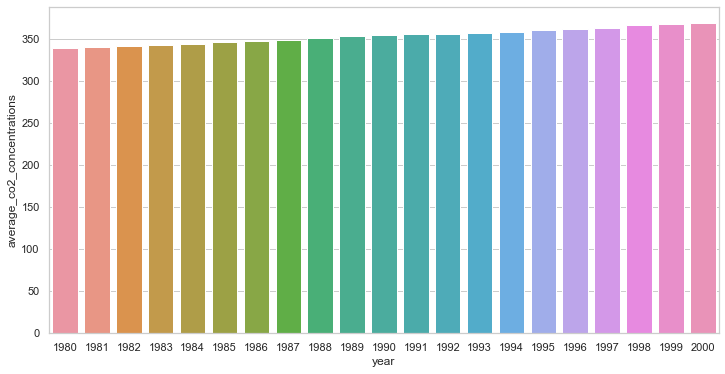

In [24]:
barplot = sns.barplot(x='year', y='average_co2_concentrations', data=df_grouped2);

<AxesSubplot:xlabel='year', ylabel='average_co2_concentrations'>

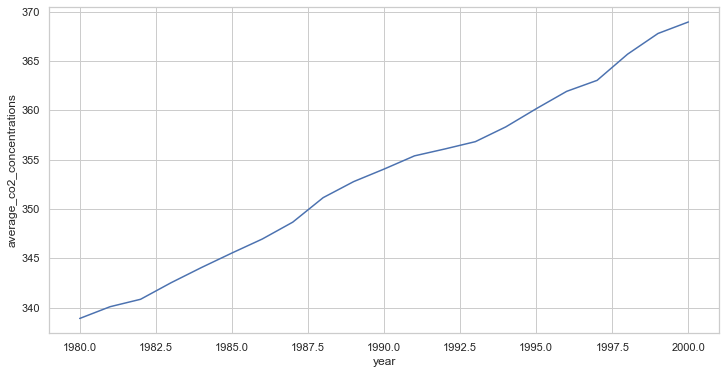

In [25]:
sns.lineplot(data=df_grouped2, x="year", y='average_co2_concentrations')

Both of the graphs we can see above show how the average of CO2 concentration has grown significantly in the last decades. 